            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


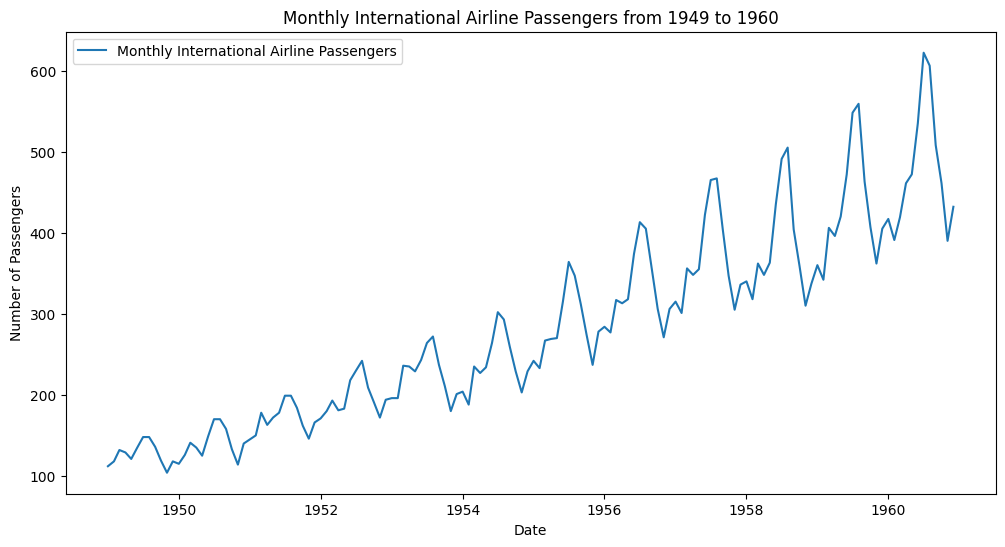

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

# Display the first few rows of the dataset
print(data.head())

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data, label='Monthly International Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Monthly International Airline Passengers from 1949 to 1960')
plt.legend()
plt.show()


In [44]:
import statsmodels.api as sm

# Define the state space model with local level and seasonal components
mod = sm.tsa.UnobservedComponents(data, level='local level', seasonal=12)

# Fit the model
res = mod.fit()

# Print the summary of the model
print(res.summary())


                            Unobserved Components Results                            
Dep. Variable:                    Passengers   No. Observations:                  144
Model:                           local level   Log Likelihood                -571.571
                   + stochastic seasonal(12)   AIC                           1149.142
Date:                       Sun, 28 Jul 2024   BIC                           1157.790
Time:                               02:12:18   HQIC                          1152.656
Sample:                           01-01-1949                                         
                                - 12-01-1960                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  1.523e-08     19.019   8.01e-10      1

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


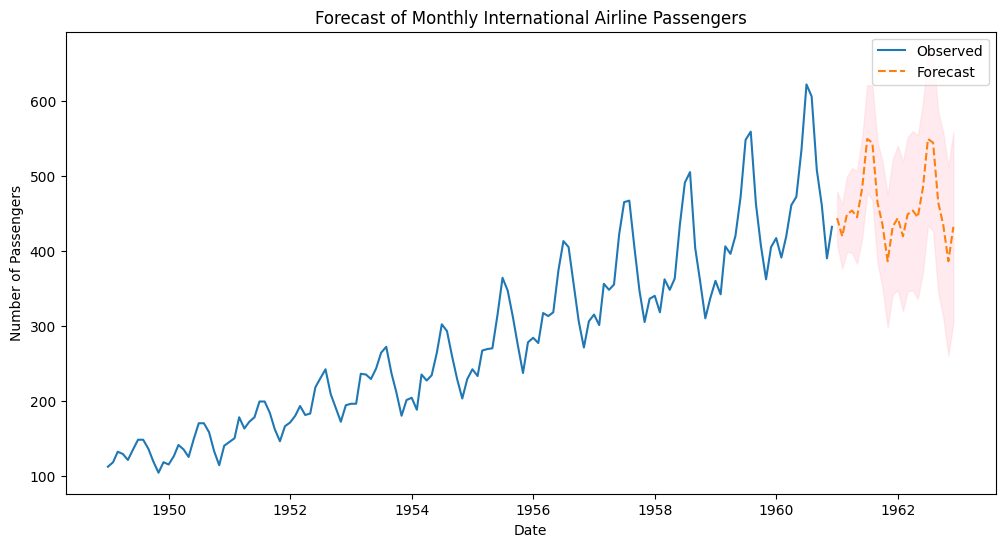

In [45]:
# Forecast the next 24 months
forecast = res.get_forecast(steps=24)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the observed data and forecasts
plt.figure(figsize=(12, 6))
plt.plot(data, label='Observed')
plt.plot(forecast_mean, label='Forecast', linestyle='--')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Forecast of Monthly International Airline Passengers')
plt.legend()
plt.show()


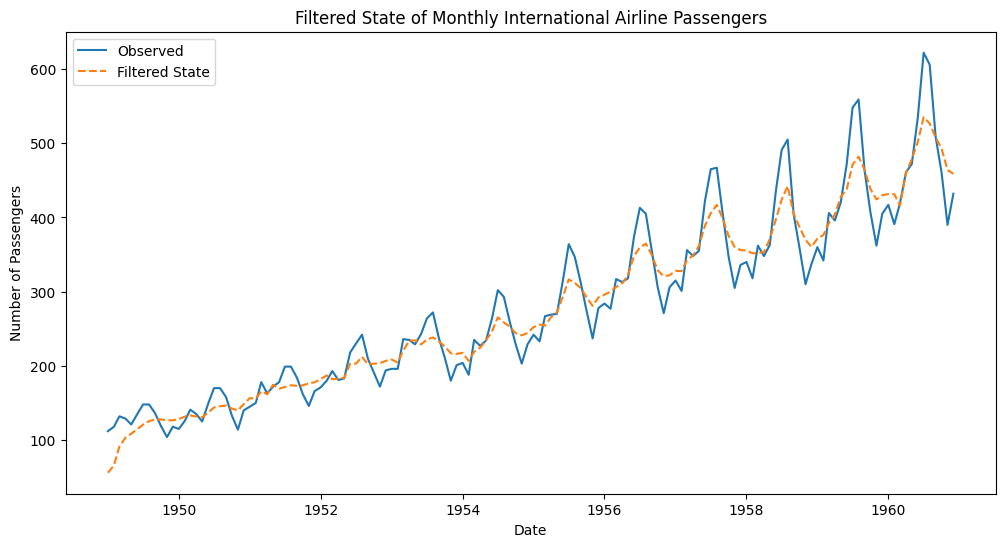

In [46]:
# Extract the filtered states
filtered_state = res.filter_results.filtered_state[0]

# Plot the observed data and filtered state
plt.figure(figsize=(12, 6))
plt.plot(data, label='Observed')
plt.plot(data.index, filtered_state, label='Filtered State', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Filtered State of Monthly International Airline Passengers')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04  5200.899902  5238.450195  5167.100098  5232.200195  5232.200195   
2010-01-05  5277.149902  5288.350098  5242.399902  5277.899902  5277.899902   
2010-01-06  5278.149902  5310.850098  5260.049805  5281.799805  5281.799805   
2010-01-07  5281.799805  5302.549805  5244.750000  5263.100098  5263.100098   
2010-01-08  5264.250000  5276.750000  5234.700195  5244.750000  5244.750000   

            Volume  
Date                
2010-01-04       0  
2010-01-05       0  
2010-01-06       0  
2010-01-07       0  
2010-01-08       0  


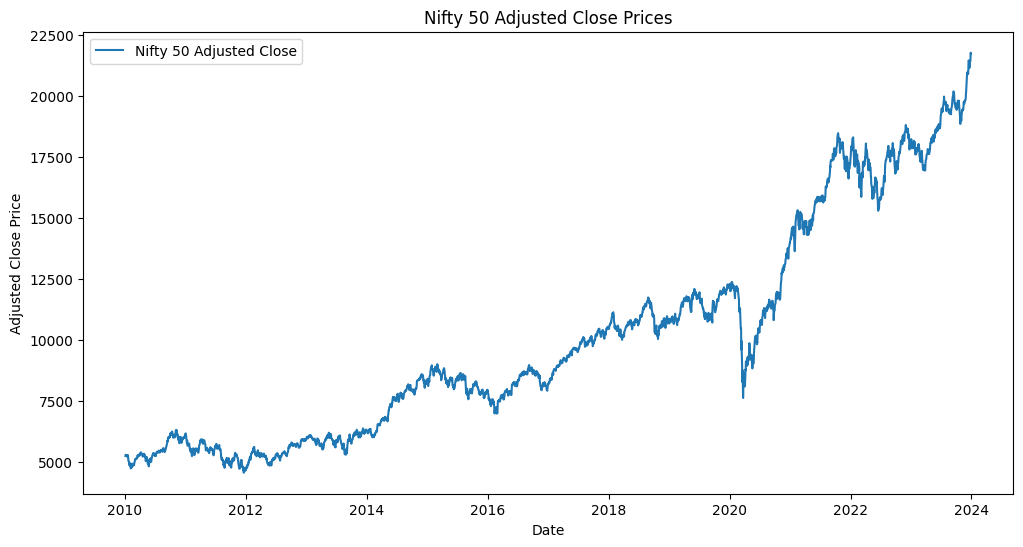

In [47]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download Nifty 50 data from Yahoo Finance
nifty = yf.download("^NSEI", start="2010-01-01", end="2024-01-01")

# Display the first few rows of the dataset
print(nifty.head())

# Plot the adjusted closing prices
plt.figure(figsize=(12, 6))
plt.plot(nifty['Adj Close'], label='Nifty 50 Adjusted Close')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Nifty 50 Adjusted Close Prices')
plt.legend()
plt.show()


In [48]:
# Handle missing values by forward filling
nifty['Adj Close'].fillna(method='ffill', inplace=True)

# Resample to monthly data
nifty_monthly = nifty['Adj Close'].resample('M').mean()

# Display the first few rows of the resampled dataset
print(nifty_monthly.head())


C:\Users\USER\AppData\Local\Temp\ipykernel_7240\3421065335.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nifty['Adj Close'].fillna(method='ffill', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7240\3421065335.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nifty['Adj Close'].fillna(method='ffill', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7240\3421065335.py:5: FutureWarning: 'M' is deprecated and will be

Date
2010-01-31    5156.223684
2010-02-28    4843.905273
2010-03-31    5178.147624
2010-04-30    5294.755054
2010-05-31    5052.971401
Freq: ME, Name: Adj Close, dtype: float64


In [49]:
import statsmodels.api as sm

# Define the state space model with local level and seasonal components
mod = sm.tsa.UnobservedComponents(nifty_monthly, level='local level', seasonal=12)

# Fit the model
res = mod.fit()

# Print the summary of the model
print(res.summary())


                            Unobserved Components Results                            
Dep. Variable:                     Adj Close   No. Observations:                  168
Model:                           local level   Log Likelihood               -1186.764
                   + stochastic seasonal(12)   AIC                           2379.528
Date:                       Sun, 28 Jul 2024   BIC                           2388.678
Time:                               02:12:19   HQIC                          2383.245
Sample:                           01-31-2010                                         
                                - 12-31-2023                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0268   1.77e+04   1.51e-06      1

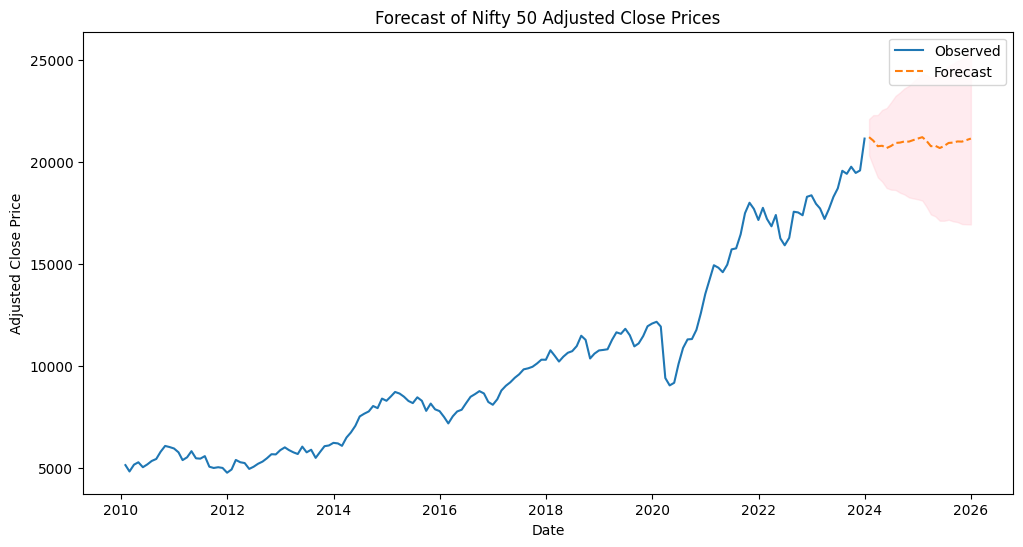

In [50]:
# Forecast the next 24 months
forecast = res.get_forecast(steps=24)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the observed data and forecasts
plt.figure(figsize=(12, 6))
plt.plot(nifty_monthly, label='Observed')
plt.plot(forecast_mean, label='Forecast', linestyle='--')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Forecast of Nifty 50 Adjusted Close Prices')
plt.legend()
plt.show()


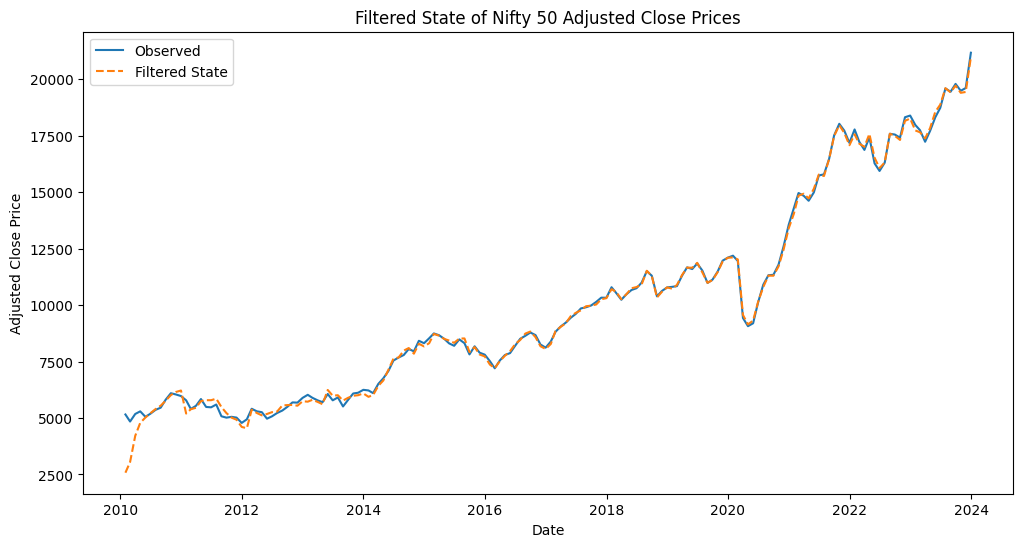

In [51]:
# Extract the filtered states
filtered_state = res.filter_results.filtered_state[0]

# Plot the observed data and filtered state
plt.figure(figsize=(12, 6))
plt.plot(nifty_monthly, label='Observed')
plt.plot(nifty_monthly.index, filtered_state, label='Filtered State', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Filtered State of Nifty 50 Adjusted Close Prices')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_11060\1288342105.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nifty['Adj Close'].fillna(method='ffill', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_11060\1288342105.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nifty['Adj Close'].fillna(method='ffill', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipy

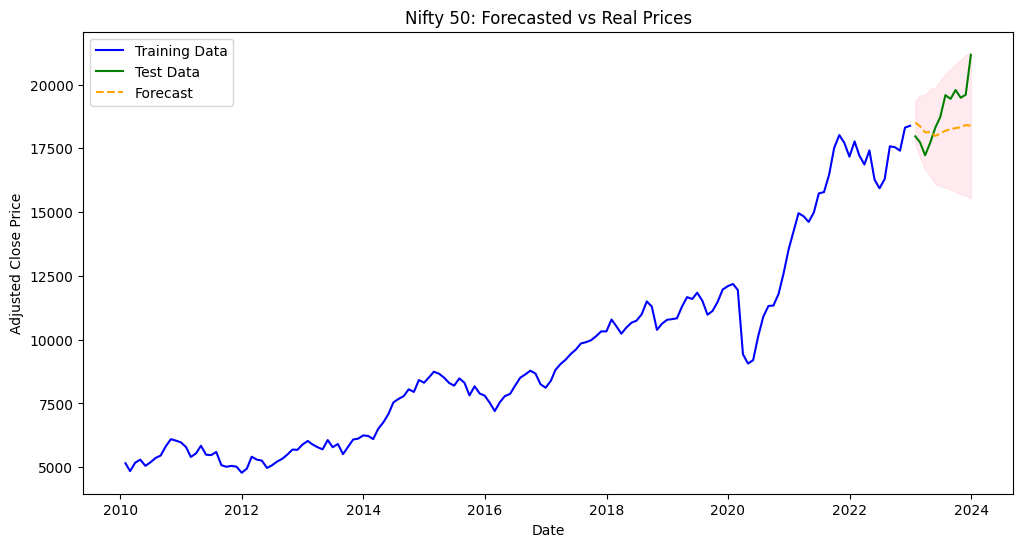

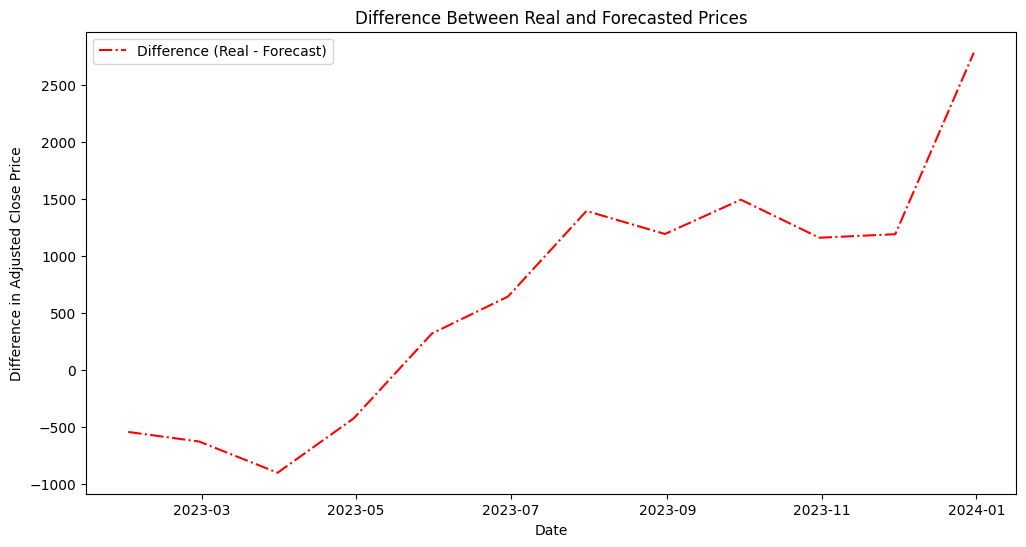

Mean Absolute Error (MAE): 1055.6855
Mean Squared Error (MSE): 1523501.3030
Root Mean Squared Error (RMSE): 1234.3019


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Download Nifty 50 data from Yahoo Finance
nifty = yf.download("^NSEI", start="2010-01-01", end="2024-01-01")

# Handle missing values by forward filling
nifty['Adj Close'].fillna(method='ffill', inplace=True)

# Resample to monthly data
nifty_monthly = nifty['Adj Close'].resample('M').mean()

# Split the data into training and testing sets
train = nifty_monthly[:'2022-12-31']
test = nifty_monthly['2023-01-01':'2023-12-31']

# Define the state space model with local level and seasonal components
mod = sm.tsa.UnobservedComponents(train, level='local level', seasonal=12)

# Fit the model
res = mod.fit()

# Forecast the next 12 months
forecast_steps = 12
forecast = res.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Ensure forecast indices align with the test data
forecast_mean.index = pd.date_range(start='2023-01-01', periods=forecast_steps, freq='M')
forecast_ci.index = forecast_mean.index

# Plot the observed data, forecast, and real prices
plt.figure(figsize=(12, 6))

# Plot observed training data
plt.plot(train, label='Training Data', color='blue')

# Plot actual test data
plt.plot(test, label='Test Data', color='green')

# Plot forecasted data
plt.plot(forecast_mean, label='Forecast', linestyle='--', color='orange')

# Plot confidence intervals
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Nifty 50: Forecasted vs Real Prices')
plt.legend()

# Show the plot
plt.show()

# Calculate the difference between the actual and forecasted prices
difference = test[:forecast_steps] - forecast_mean

# Plot the difference
plt.figure(figsize=(12, 6))
plt.plot(difference, label='Difference (Real - Forecast)', linestyle='-.', color='red')
plt.xlabel('Date')
plt.ylabel('Difference in Adjusted Close Price')
plt.title('Difference Between Real and Forecasted Prices')
plt.legend()
plt.show()

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(test[:forecast_steps], forecast_mean)
mse = mean_squared_error(test[:forecast_steps], forecast_mean)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


In [2]:
mae_ssm_1 = mean_absolute_error(test, forecast_mean)

# Calculate MSE
mse_ssm_1 = mean_squared_error(test, forecast_mean)

# Calculate RMSE
rmse_ssm_1 = np.sqrt(mse_ssm_1)

# Calculate MAPE
mape_ssm_1 = np.mean(np.abs((test - forecast_mean) / test)) * 100

# Print the error metrics
print("State Space Model (SSM) Error Metrics:")
print(f"MAE: {mae_ssm_1:.2f}")
print(f"MSE: {mse_ssm_1:.2f}")
print(f"RMSE: {rmse_ssm_1:.2f}")
print(f"MAPE: {mape_ssm_1:.2f}%")

State Space Model (SSM) Error Metrics:
MAE: 1055.69
MSE: 1523501.30
RMSE: 1234.30
MAPE: 5.44%


## Adding S&P 500 with Nifty50

[*********************100%%**********************]  1 of 1 completed


C:\Users\USER\AppData\Local\Temp\ipykernel_11060\3562152538.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nifty['Adj Close'].fillna(method='ffill', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_11060\3562152538.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nifty['Adj Close'].fillna(method='ffill', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_11060\3562152538.py:15: FutureWarning: 'M' is deprecated and 

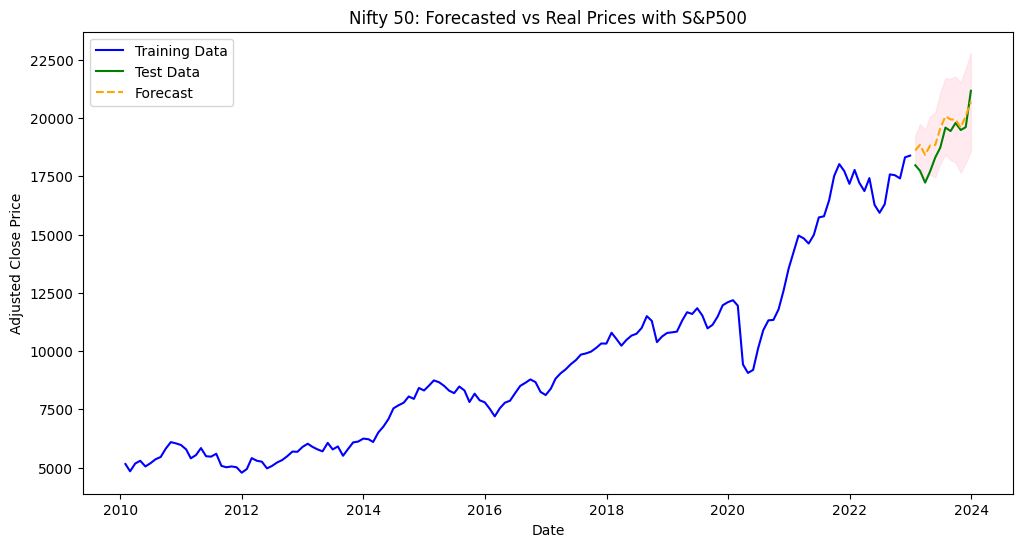

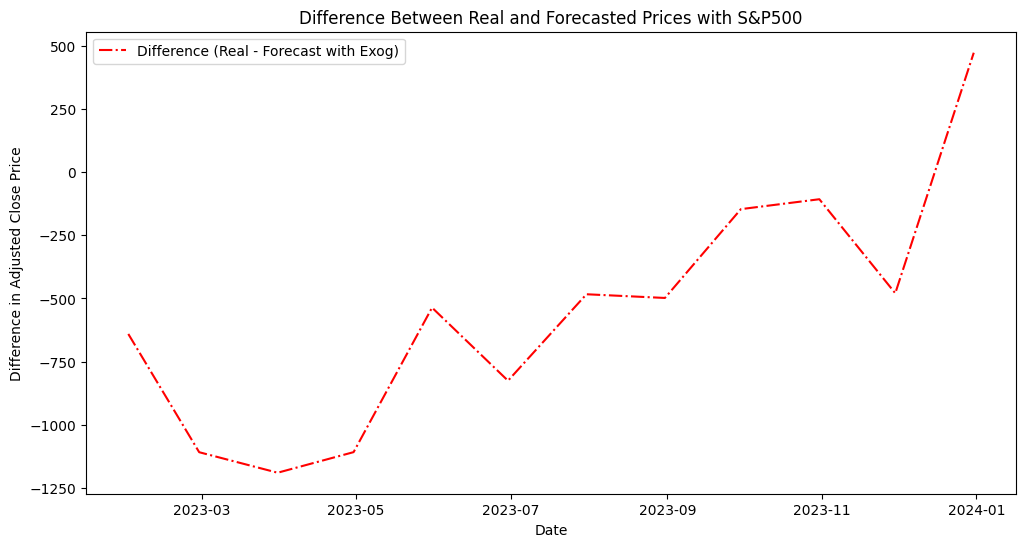

Mean Absolute Error (MAE) with Exog: 633.2112
Mean Squared Error (MSE) with Exog: 518761.8051
Root Mean Squared Error (RMSE) with Exog: 720.2512


In [58]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Download Nifty 50 data from Yahoo Finance
nifty = yf.download("^NSEI", start="2010-01-01", end="2024-01-01")

# Handle missing values by forward filling
nifty['Adj Close'].fillna(method='ffill', inplace=True)

# Resample to monthly data
nifty_monthly = nifty['Adj Close'].resample('M').mean()

# Split the data into training and testing sets
train = nifty_monthly[:'2022-12-31']
test = nifty_monthly['2023-01-01':'2023-12-31']

# Download S&P 500 data from Yahoo Finance
sp500 = yf.download("^GSPC", start="2010-01-01", end="2024-01-01")

# Handle missing values by forward filling
sp500['Adj Close'].fillna(method='ffill', inplace=True)

# Resample to monthly data
sp500_monthly = sp500['Adj Close'].resample('M').mean()

# Align the S&P 500 data with Nifty 50 data
exog_data = sp500_monthly.loc[train.index]
exog_forecast = sp500_monthly.loc[test.index]

# Define the state space model with local level, seasonal components, and exogenous variable
mod_exog = sm.tsa.UnobservedComponents(train, level='local level', seasonal=12, exog=exog_data)

# Fit the model
res_exog = mod_exog.fit()

# Forecast the next 12 months
forecast_steps = 12
forecast_exog = res_exog.get_forecast(steps=forecast_steps, exog=exog_forecast)
forecast_mean_exog = forecast_exog.predicted_mean
forecast_ci_exog = forecast_exog.conf_int()

# Ensure forecast indices align with the test data
forecast_mean_exog.index = pd.date_range(start='2023-01-01', periods=forecast_steps, freq='M')
forecast_ci_exog.index = forecast_mean_exog.index

# Plot the observed data, forecast, and real prices
plt.figure(figsize=(12, 6))

# Plot observed data
plt.plot(train, label='Training Data', color='blue')
plt.plot(test, label='Test Data', color='green')

# Plot forecasted data
plt.plot(forecast_mean_exog, label='Forecast', linestyle='--', color='orange')

# Plot confidence intervals
plt.fill_between(forecast_ci_exog.index, forecast_ci_exog.iloc[:, 0], forecast_ci_exog.iloc[:, 1], color='pink', alpha=0.3)

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Nifty 50: Forecasted vs Real Prices with S&P500')
plt.legend()

# Show the plot
plt.show()

# Calculate the difference between the actual and forecasted prices
difference_exog = test - forecast_mean_exog

# Plot the difference
plt.figure(figsize=(12, 6))
plt.plot(difference_exog, label='Difference (Real - Forecast with Exog)', linestyle='-.', color='red')
plt.xlabel('Date')
plt.ylabel('Difference in Adjusted Close Price')
plt.title('Difference Between Real and Forecasted Prices with S&P500')
plt.legend()
plt.show()

# Calculate MAE, MSE, and RMSE
mae_exog = mean_absolute_error(test, forecast_mean_exog)
mse_exog = mean_squared_error(test, forecast_mean_exog)
rmse_exog = np.sqrt(mse_exog)

print(f"Mean Absolute Error (MAE) with Exog: {mae_exog:.4f}")
print(f"Mean Squared Error (MSE) with Exog: {mse_exog:.4f}")
print(f"Root Mean Squared Error (RMSE) with Exog: {rmse_exog:.4f}")


In [21]:
mae_ssm_exog = mean_absolute_error(test, forecast_mean_exog)
mse_ssm_exog = mean_squared_error(test, forecast_mean_exog)
rmse_ssm_exog = np.sqrt(mse_ssm_exog)
mape_ssm_exog = np.mean(np.abs(difference_exog / test)) * 100

print("\nState Space Model with Exogenous Variable (SSM+Exog) Error Metrics:")
print(f"MAE: {mae_ssm_exog:.2f}")
print(f"MSE: {mse_ssm_exog:.2f}")
print(f"RMSE: {rmse_ssm_exog:.2f}")
print(f"MAPE: {mape_ssm_exog:.2f}%")


State Space Model with Exogenous Variable (SSM+Exog) Error Metrics:
MAE: 633.21
MSE: 518761.81
RMSE: 720.25
MAPE: 3.44%


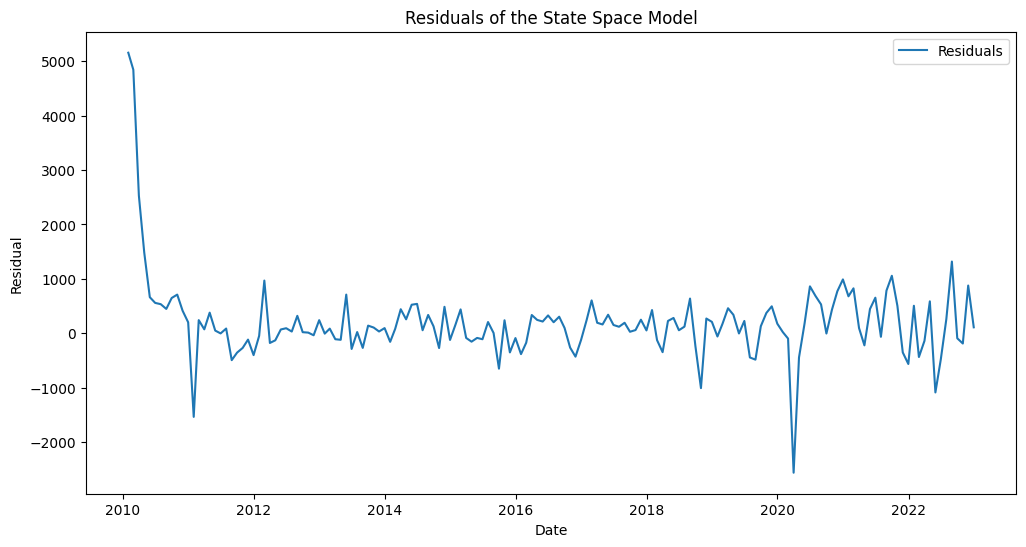

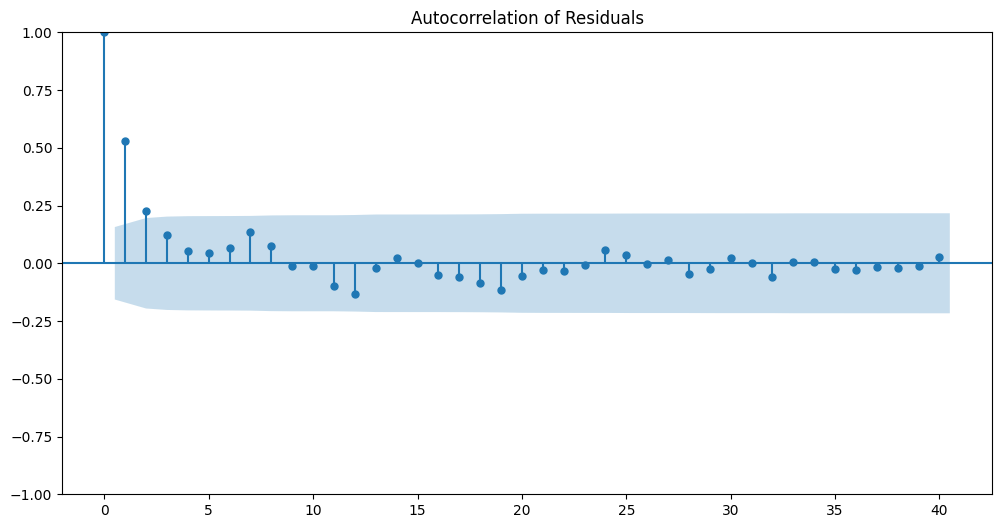

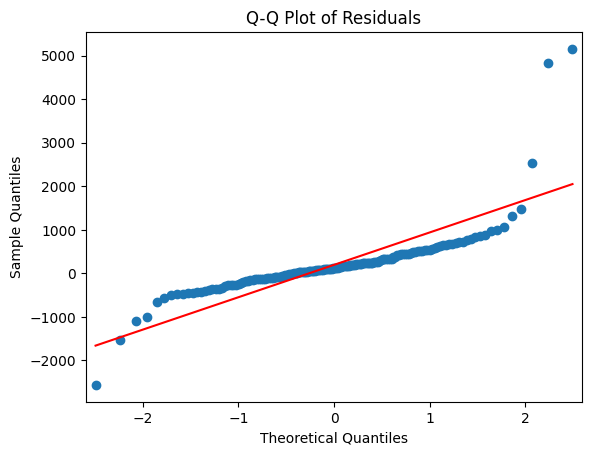

      lb_stat     lb_pvalue
12  65.044909  2.674651e-09


In [76]:
# Plot the residuals
residuals = res.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('Residuals of the State Space Model')
plt.legend()
plt.show()

# ACF plot of residuals
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax)
plt.title('Autocorrelation of Residuals')
plt.show()

# Q-Q plot of residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Perform Ljung-Box test
lb_test = sm.stats.acorr_ljungbox(residuals, lags=[12], return_df=True)
print(lb_test)


## Nifty 50 With Bank Nifty and Sensex

[*********************100%%**********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_11060\585571859.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nifty['Adj Close'].fillna(method='ffill', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_11060\585571859.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nifty['Adj Close'].fillna(method='ffill', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipyke

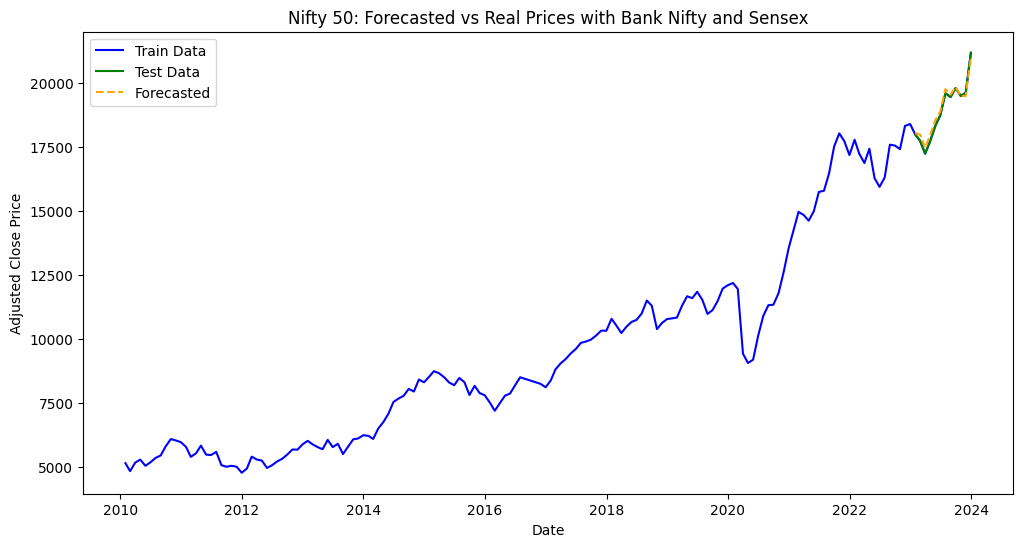

In [59]:
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Define the start and end dates
start_date = "2010-01-01"
end_date = "2024-01-01"

# Download Nifty 50 data
nifty = yf.download("^NSEI", start=start_date, end=end_date)
nifty['Adj Close'].fillna(method='ffill', inplace=True)
nifty_monthly = nifty['Adj Close'].resample('M').mean()

# Download Bank Nifty data
bank_nifty = yf.download("^NSEBANK", start=start_date, end=end_date)
bank_nifty['Adj Close'].fillna(method='ffill', inplace=True)
bank_nifty_monthly = bank_nifty['Adj Close'].resample('M').mean()

# Download Sensex data
sensex = yf.download("^BSESN", start=start_date, end=end_date)
sensex['Adj Close'].fillna(method='ffill', inplace=True)
sensex_monthly = sensex['Adj Close'].resample('M').mean()

# Combine the data into a single DataFrame
data = pd.DataFrame({
    'Nifty': nifty_monthly,
    'BankNifty': bank_nifty_monthly,
    'Sensex': sensex_monthly
})

# Drop rows with any missing values
data.dropna(inplace=True)

# Split the data into training and test sets
train = data[:'2022']
test = data['2023':]

# Define the state space model with exogenous variables (Bank Nifty and Sensex)
mod_exog = sm.tsa.UnobservedComponents(train['Nifty'], level='local level', seasonal=12, exog=train[['BankNifty', 'Sensex']])

# Fit the model
res_exog = mod_exog.fit()

# Prepare the exogenous variables for forecasting
exog_forecast = test[['BankNifty', 'Sensex']]

# Forecast the next 12 months
forecast_exog = res_exog.get_forecast(steps=len(test), exog=exog_forecast)
forecast_mean_exog = forecast_exog.predicted_mean

# Ensure the indices are aligned for plotting
forecast_mean_exog.index = test.index

# Plot the historical and forecasted data
plt.figure(figsize=(12, 6))

# Plot historical data up to the start of the test period
plt.plot(data.index, data['Nifty'], label='Train Data', color='blue')

# Plot actual test data
plt.plot(test.index, test['Nifty'], label='Test Data', color='green')

# Plot forecasted data
plt.plot(forecast_mean_exog.index, forecast_mean_exog, label='Forecasted', linestyle='--', color='orange')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Nifty 50: Forecasted vs Real Prices with Bank Nifty and Sensex')
plt.legend()

# Show the plot
plt.show()


In [13]:
train

,Nifty,BankNifty,Sensex
Date,,,
2010-01-31,5156.223684,8943.951275,17260.413960
2010-02-28,4843.905273,8470.640933,16197.918483
2010-03-31,5178.147624,9205.069196,17302.716053
2010-04-30,5294.755054,9609.608301,17678.639941
2010-05-31,5052.971401,9406.788272,16844.535342
...,...,...,...
2022-08-31,17579.064941,38657.985352,58990.511719
2022-09-30,17544.877308,39903.240589,58843.428445
2022-10-31,17406.873664,39893.010485,58632.369860


In [19]:
# Calculate MAE, MSE, RMSE, and MAPE
mae_combined = np.mean(np.abs(errors))
mse_combined = np.mean(errors**2)
rmse_combined = np.sqrt(mse_combined)
mape_combined = np.mean(np.abs(errors / test['Nifty'])) * 100

# Print the error metrics
print("Error Metrics for the State Space Model with Exogenous Variables:")
print(f"Mean Absolute Error (MAE): {mae_combined:.4f}")
print(f"Mean Squared Error (MSE): {mse_combined:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_combined:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_combined:.2f}%")

Error Metrics for the State Space Model with Exogenous Variables:
Mean Absolute Error (MAE): 145.0838
Mean Squared Error (MSE): 27003.0648
Root Mean Squared Error (RMSE): 164.3261
Mean Absolute Percentage Error (MAPE): 0.78%


## Compairing With ARIMA

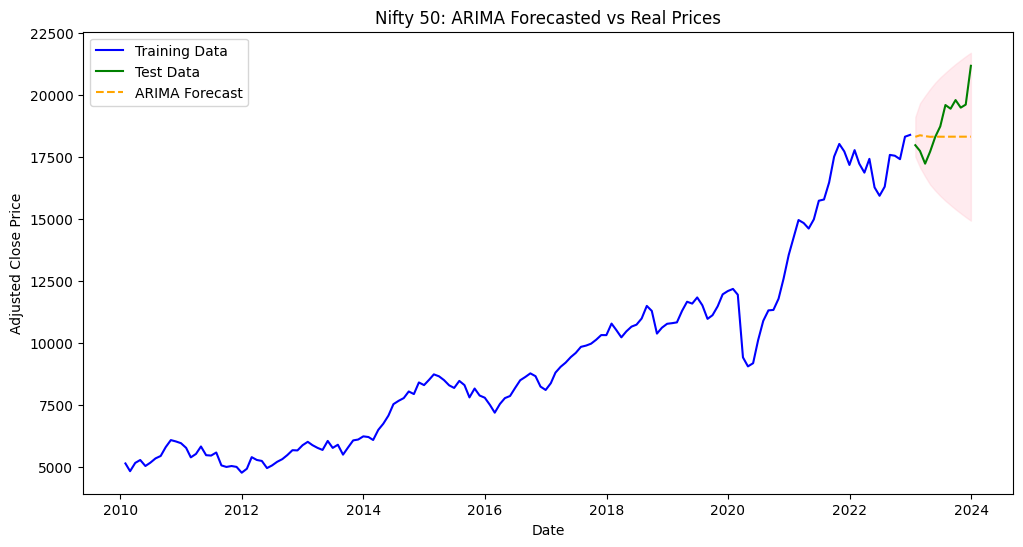

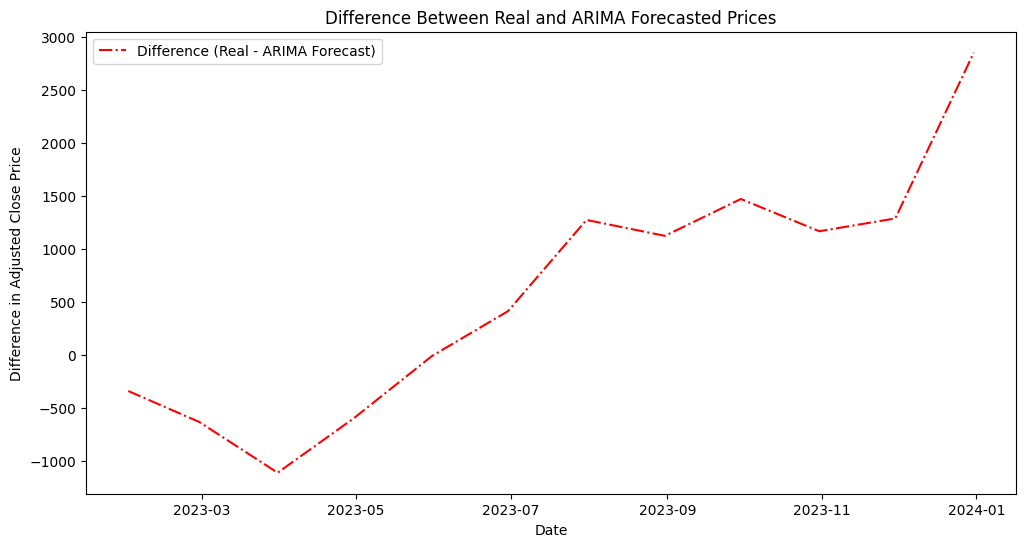

Mean Absolute Error (MAE) with ARIMA: 1023.7310
Mean Squared Error (MSE) with ARIMA: 1543014.7072
Root Mean Squared Error (RMSE) with ARIMA: 1242.1814


In [70]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
train = nifty_monthly[:'2022-12-31']
test = nifty_monthly['2023-01-01':'2023-12-31']
# Define forecast steps
forecast_steps = len(test)  # Forecast for the length of the test period

# Fit ARIMA model
arima_mod = ARIMA(train, order=(4, 1, 0)) 
arima_res = arima_mod.fit()

# Forecast the next months
arima_forecast = arima_res.get_forecast(steps=forecast_steps)
arima_forecast_mean = arima_forecast.predicted_mean
arima_forecast_ci = arima_forecast.conf_int()

# Ensure forecast indices align with the test data
arima_forecast_mean.index = test.index
arima_forecast_ci.index = test.index

# Plot the observed data, forecast, and real prices
plt.figure(figsize=(12, 6))

# Plot observed training data
plt.plot(train, label='Training Data', color='blue')

# Plot observed test data
plt.plot(test, label='Test Data', color='green')

# Plot forecasted data
plt.plot(arima_forecast_mean, label='ARIMA Forecast', linestyle='--', color='orange')

# Plot confidence intervals
plt.fill_between(arima_forecast_ci.index, arima_forecast_ci.iloc[:, 0], arima_forecast_ci.iloc[:, 1], color='pink', alpha=0.3)

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Nifty 50: ARIMA Forecasted vs Real Prices')
plt.legend()

# Show the plot
plt.show()

# Calculate the difference between the actual and forecasted prices for ARIMA
arima_difference = test - arima_forecast_mean

# Plot the difference
plt.figure(figsize=(12, 6))
plt.plot(arima_difference, label='Difference (Real - ARIMA Forecast)', linestyle='-.', color='red')
plt.xlabel('Date')
plt.ylabel('Difference in Adjusted Close Price')
plt.title('Difference Between Real and ARIMA Forecasted Prices')
plt.legend()
plt.show()

# Calculate MAE, MSE, and RMSE for ARIMA forecast
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_arima = mean_absolute_error(test, arima_forecast_mean)
mse_arima = mean_squared_error(test, arima_forecast_mean)
rmse_arima = np.sqrt(mse_arima)

print(f"Mean Absolute Error (MAE) with ARIMA: {mae_arima:.4f}")
print(f"Mean Squared Error (MSE) with ARIMA: {mse_arima:.4f}")
print(f"Root Mean Squared Error (RMSE) with ARIMA: {rmse_arima:.4f}")


In [74]:
mae_arima = mean_absolute_error(test, arima_forecast_mean)
mse_arima = mean_squared_error(test, arima_forecast_mean)
rmse_arima = np.sqrt(mse_arima)
mape_arima = np.mean(np.abs(arima_difference / test)) * 100
print("\nARIMA Model Error Metrics:")
print(f"MAE: {mae_arima:.2f}")
print(f"MSE: {mse_arima:.2f}")
print(f"RMSE: {rmse_arima:.2f}")
print(f"MAPE: {mape_arima:.2f}%")


ARIMA Model Error Metrics:
MAE: 1023.73
MSE: 1543014.71
RMSE: 1242.18
MAPE: 5.28%


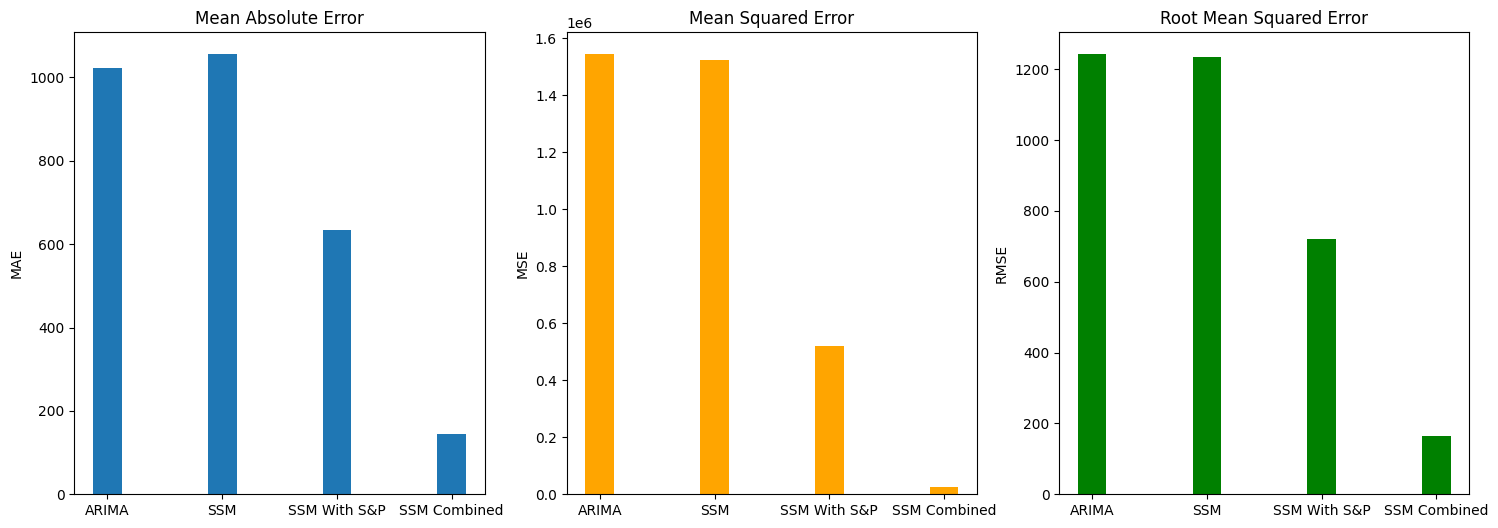

In [73]:
# Plotting the error metrics for comparison
labels = ['ARIMA', 'SSM', "SSM With S&P", 'SSM Combined']
mae_values = [mae_arima, mae_ssm_1, mae_ssm_exog, mae_combined]
mse_values = [mse_arima, mse_ssm_1, mse_ssm_exog, mse_combined]
rmse_values = [rmse_arima, rmse_ssm_1, rmse_ssm_exog, rmse_combined]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot MAE
ax[0].bar(x, mae_values, width, label='MAE')
ax[0].set_ylabel('MAE')
ax[0].set_title('Mean Absolute Error')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)

# Plot MSE
ax[1].bar(x, mse_values, width, label='MSE', color='orange')
ax[1].set_ylabel('MSE')
ax[1].set_title('Mean Squared Error')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)

# Plot RMSE
ax[2].bar(x, rmse_values, width, label='RMSE', color='green')
ax[2].set_ylabel('RMSE')
ax[2].set_title('Root Mean Squared Error')
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels)

plt.show()


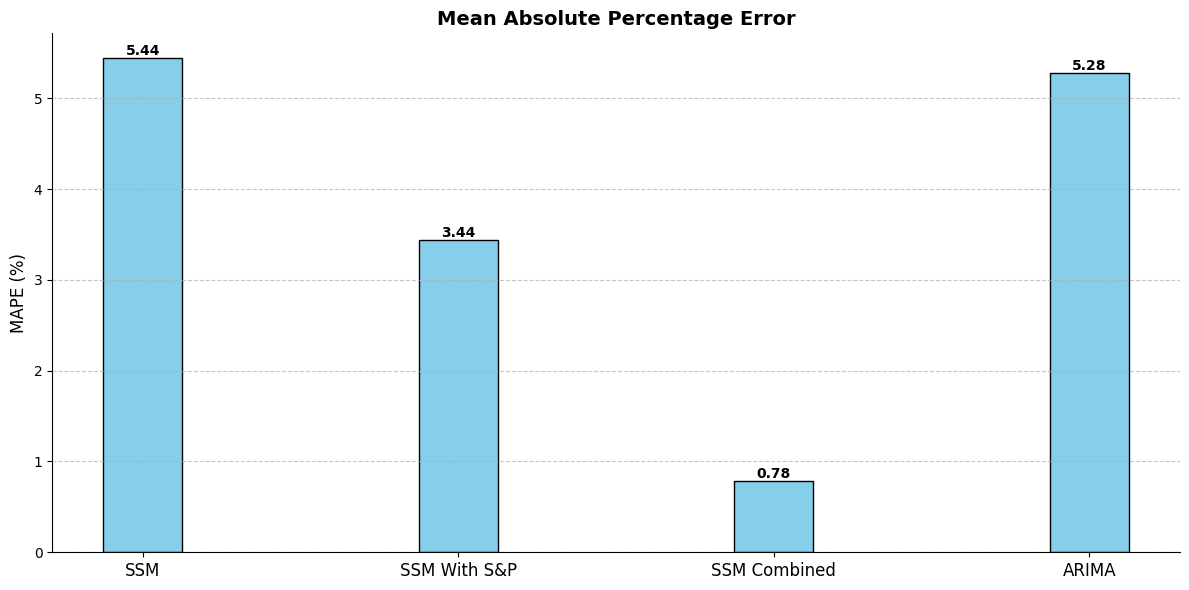

In [75]:
labels = ['SSM', 'SSM With S&P', 'SSM Combined', 'ARIMA']
mape_values = [mape_ssm_1, mape_ssm_exog, mape_combined, mape_arima]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot MAPE
bars = ax.bar(x, mape_values, width, color='skyblue', edgecolor='black')

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval , round(yval, 2), ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Add labels and title
ax.set_ylabel('MAPE (%)', fontsize=12)
ax.set_title('Mean Absolute Percentage Error', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12, rotation=0)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()